<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Взвешивание классов</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_curve, roc_auc_score
from sklearn.utils import shuffle
from numpy import array 

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
display(data.head())
display(data.info())
display(data.describe())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Видим, что в столбце Tenure(сколько лет человек является клиентом банка) есть 909 пропусков. Эти пропуски не заполнить ни средним, ни медианой. Удалим эти пропуски. Для работы нам будут не нужны три столбца - RowNumber, CustomerId, Surname т.к модель по ним обучиться не сможет. Удалим их

In [3]:
data = data.dropna()
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [4]:
data.duplicated().sum()

0

Дубликатов нет. Преобразуем категориальные признаки к числовым.

In [5]:
data = pd.get_dummies(data, drop_first=True)

In [7]:
encoder = OneHotEncoder()
encoder.fit_transform(data).toarray()
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2.0,0.00,2,0,0,167773.55,0,0,0,0
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0


Разделим данные на 3 выборки

In [8]:
data_train, data_1 = train_test_split(data, test_size=0.4, random_state=148)
data_valid, data_test = train_test_split(data_1, test_size=0.5, random_state=148)

features_train = data_train.drop(['Exited'], axis=1) 
target_train = data_train['Exited'] 

features_valid = data_valid.drop(['Exited'], axis=1) 
target_valid= data_valid['Exited'] 

features_test = data_test.drop(['Exited'], axis=1) 
target_test = data_test['Exited'] 

Масштабируем признаки

In [9]:
scaler = StandardScaler()
numeric = ['CreditScore', 'Age', 'Balance', 'Tenure', 'EstimatedSalary']
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

## Исследование задачи

0    0.796062
1    0.203938
Name: Exited, dtype: float64


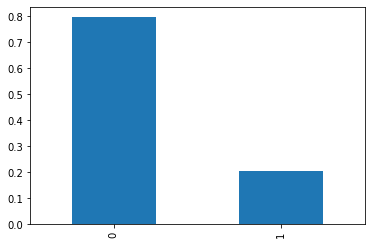

In [10]:
data['Exited'].value_counts(normalize=True).plot(kind='bar')
print(data['Exited'].value_counts(normalize=True))

Дисбаланс классов.В основном(почти 80%) преобладает отрицательный класс. Попробуем обучить наши модели без изменения дисбаланса классов. 

Обучающее дерево:

In [11]:
model = DecisionTreeClassifier(random_state=148)
model.fit(features_train, target_train)
predict_valid = model.predict(features_valid)
proba = model.predict_proba(features_valid)
probabilities_one_valid = proba[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC ROC:', auc_roc)
print('F1:', f1_score(target_valid, predict_valid))

AUC ROC: 0.6875982882097984
F1: 0.5065963060686017


Cлучайный лес

In [12]:
model = RandomForestClassifier(random_state=148)
model.fit(features_train, target_train)
predict_valid = model.predict(features_valid)
proba = model.predict_proba(features_valid)
probabilities_one_valid = proba[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC ROC:', auc_roc)
print('F1:', f1_score(target_valid, predict_valid))

AUC ROC: 0.8530631218070601
F1: 0.5741935483870968


Логистическая регрессия

In [13]:
model = LogisticRegression(random_state=148, solver='liblinear')
model.fit(features_train, target_train)
predict_valid = model.predict(features_valid)
proba = model.predict_proba(features_valid)
probabilities_one_valid = proba[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC ROC:', auc_roc)
print('F1:', f1_score(target_valid, predict_valid))

AUC ROC: 0.7655220028602896
F1: 0.332688588007737


Лучшие показатели AUC ROC и F1 у случайного леса. Попробуем поменять гиперпараметры, чтобы улучшить модель

In [14]:
best_model = None
best_f1 = 0
for i in range(1,101,1):
    model = RandomForestClassifier(random_state=148, max_depth=i)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    if f1 > best_f1:
        best_model= model
        best_f1 = f1
print(best_model, best_f1, sep='\n')

RandomForestClassifier(max_depth=14, random_state=148)
0.5857605177993528


Лучшая глубина 14

In [15]:
best_model = None
best_f1 = 0
for i in range(1,101,1):
    model = RandomForestClassifier(random_state=148, max_depth=14, n_estimators=i)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    if f1 > best_f1:
        best_model= model
        best_f1 = f1
print(best_model, best_f1, sep='\n')

RandomForestClassifier(max_depth=14, n_estimators=48, random_state=148)
0.5955414012738853


Лучшие гиперпараметры: глубина - 16, число деревьев - 48

In [16]:
best_model = RandomForestClassifier(random_state=148, max_depth=14, n_estimators=48)
best_model.fit(features_train, target_train)
predict_valid = best_model.predict(features_valid)
proba = best_model.predict_proba(features_valid)
probabilities_one_valid = proba[:, 1]
auc_roc_v = roc_auc_score(target_valid, probabilities_one_valid)
f1_v = f1_score(target_valid, predict_valid)
print('AUC ROC:', auc_roc_v)
print('F1:', f1_v)

AUC ROC: 0.8540631272865422
F1: 0.5955414012738853


У лучшей модели(случайный лес с гиперпараметрами max_depth=16, n_estimators=43), метрики равны: 

- AUC ROC: 0.8540631272865422
- F1: 0.5955414012738853

После изменения гиперпараметров, значение AUC ROC немного повысилась. Но наш целевой показатель это F1-мера, и он вырос. Ориентируемся по нему. Чтобы повысить показатель метрики, будем бороться с дисбалансом классов

## Борьба с дисбалансом

### Увеличение выборки

In [17]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [18]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

In [19]:
best_model_upsample= RandomForestClassifier(random_state=148, max_depth=14, n_estimators=48)
best_model_upsample.fit(features_upsampled, target_upsampled)
predict = best_model_upsample.predict(features_valid)
f1_up_v = f1_score(target_valid, predict)
print("F1:", f1_up_v)
proba = best_model_upsample.predict_proba(features_valid)
probabilities_one_valid = proba[:, 1]
auc_roc_up_v = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC ROC:', auc_roc_up_v)

F1: 0.6012738853503186
AUC ROC: 0.8420694542618498


После увеличения выборки, F1-мера и AUC ROC снизились. Но целевой показатель в допустимом диапазоне.

### Уменьшение выборки

In [20]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)


In [21]:
best_model_downsample = RandomForestClassifier(random_state=148, max_depth=14, n_estimators=48)
best_model_downsample.fit(features_downsampled, target_downsampled)
predict = best_model_downsample.predict(features_valid)
f1_down_v = f1_score(target_valid, predict)
print("F1:", f1_down_v)
proba = best_model_downsample.predict_proba(features_valid)
probabilities_one_valid = proba[:, 1]
auc_roc_down_v = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC ROC:', auc_roc_down_v)

F1: 0.47425474254742545
AUC ROC: 0.8303616275522971


Уменьшение выборки тоже не помогло. F-1 сильно уменьшилась,  и AUC ROC стало меньше.

### Взвешивание классов

In [22]:
best_model_class = RandomForestClassifier(random_state=148, max_depth=14, n_estimators=48, class_weight='balanced')
best_model_class.fit(features_train, target_train)
predicted_valid = best_model_class.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))
proba = best_model_class.predict_proba(features_valid)
probabilities_one_valid = proba[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC ROC:', auc_roc)

F1: 0.5858267716535434
AUC ROC: 0.8507142504890437


Взвешивание классов не подходит, F1 уменьшилась

Переподбирать порог на тестовом сете не имеет смысла, т.к. модель переобучится, но уже на тестовом сете, и будет плохо воспринимать любые новые данные. Но мы этого уже не узнаем, потому что другого тестового сета у нас нет. Поэтому изменять порог мы не будем

## Тестирование модели

In [23]:
predict_valid = best_model.predict(features_test)
proba = best_model.predict_proba(features_test)
probabilities_one_valid = proba[:, 1]
auc_roc_t = roc_auc_score(target_test, probabilities_one_valid)
f1_t = f1_score(target_test, predict_valid)
print('F1:', f1_t)
print('AUC ROC:', auc_roc_t )

F1: 0.5672131147540984
AUC ROC: 0.8496414526948877


In [24]:
predict = best_model_upsample.predict(features_test)
f1_up_t = f1_score(target_test, predict)
print("F1:", f1_up_t)
proba = best_model_upsample.predict_proba(features_test)
probabilities_one_test = proba[:, 1]
auc_roc_up_t = roc_auc_score(target_test, probabilities_one_test)
print('AUC ROC:', auc_roc_up_t)

F1: 0.6041666666666666
AUC ROC: 0.844514758636896


In [25]:
predict = best_model_downsample.predict(features_test)
f1_down_t = f1_score(target_test, predict)
print("F1:", f1_down_t)
proba = best_model_downsample.predict_proba(features_test)
probabilities_one_test = proba[:, 1]
auc_roc_down_t = roc_auc_score(target_test, probabilities_one_test)
print('AUC ROC:', auc_roc_down_t)

F1: 0.46671149966375247
AUC ROC: 0.8284847750496604


In [26]:
metric = ['model' ,'f_1', 'auc_roc']
means = [['random_forest_valid', f1_v, auc_roc_v], ['random_forest_valid_upsample', f1_up_v, auc_roc_up_v], 
         ['random_forest_valid_downsample', f1_down_v, auc_roc_down_v], ['', '', ''], 
         ['random_forest_test', f1_t, auc_roc_t], ['random_forest_test_upsample', f1_up_t, auc_roc_up_t],
         ['random_forest_test_downsample', f1_down_t, auc_roc_down_t]]
table = pd.DataFrame(data=means, columns=metric)
table

,model,f_1,auc_roc
0,random_forest_valid,0.595541,0.854063
1,random_forest_valid_upsample,0.601274,0.842069
2,random_forest_valid_downsample,0.474255,0.830362
3,,,
4,random_forest_test,0.567213,0.849641
5,random_forest_test_upsample,0.604167,0.844515
6,random_forest_test_downsample,0.466711,0.828485


Лучшие метрики получились у моделей, обученных по увеличенным выборкам (best_model_upsample). Целевой показатель достигнут: F1>0.59. Несмотря на то, что F1-мера менялась очень сильно, метрика AUC ROC практически всегда оставалась на одном уровне.